# Collison Course
13.05.2025
- Karen Witness - s196140
- Ida Sandelius - s204649
- Miranda Niemann Kristensen - s204257



### Import packages

In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
from IPython.display import display
import seaborn as sns
from bokeh.models import ColumnDataSource, HoverTool, NumeralTickFormatter
from bokeh.io import curdoc, output_file
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Category10
from bokeh.layouts import row
from bokeh.models import Legend
import plotly.express as px
import requests
import json
import plotly.io as pio

### Initializing the data

In [14]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

'#Import data\nfilename = \'Motor_Vehicle_Collisions_-_Crashes_20250415.csv\'\n\ndf = pd.read_csv(filename)\n\n#Print the header\n#print(df.head())\n\n#split up the date into year, month, day\ndf[\'CRASH DATE\'] = pd.to_datetime(df[\'CRASH DATE\'], format=\'%m/%d/%Y\')\ndf[\'Year\'] = df[\'CRASH DATE\'].dt.year\n\n#print(df.head())\n\n# Remove years 2012 and 2025\ndf = df[(df[\'Year\'] != 2012) & (df[\'Year\'] != 2025)]\n\n#print(df.head())\n\n# Save the merged DataFrame to a CSV file\ndf.to_csv("sorted_data.csv", index=False)'

In [15]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\miran\AppData\Local\Temp\ipykernel_2612\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


In [16]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Day'] = pd.to_datetime(data['CRASH DATE']).dt.day

## Motivation

Our dataset records motor vehicle collisions in New York City from 2012 to 2025.
It includes details like crash date and time, borough, location (latitude and longitude), number of injuries and fatalities, types of vehicles involved, and contributing factors.

We chose this dataset because traffic data is rich, structured, and publicly available, allowing us to explore patterns, trends and different developments within traffic in NYC. 

Our goal is for users to intuitively explore traffic incidents across NYC. We want users to easily identify accident hotspots, understand peak crash times, and see what factors most often contribute to collisions.


## Basic stats

Our choices in data cleaning and preprocessing:
- We removed rows with missing data for the following categories: crash time, borough, latitude, longitude, contributing factor and vehicle type. 
- Dates were converted to proper datetime format for time-based analysis (year, month, day of week).
- The data for the years 2012 and 2025 were removed to ensure data is only from a full year

The dataset consist of 679.000 data points, where each point is a collison, and there are 29 categories. The vehicle type have not been taken into consideration in the analysis, and neither have the street names. 

The initial plots showed us, a significant change in vehicle crashes for the years 2019 and 2020. However, considering the large decrease in crashes, there was not an equally as large decrease in injuries and fatalities. These things were what we decided to investigate further. 

### Initial plots to determine the direction

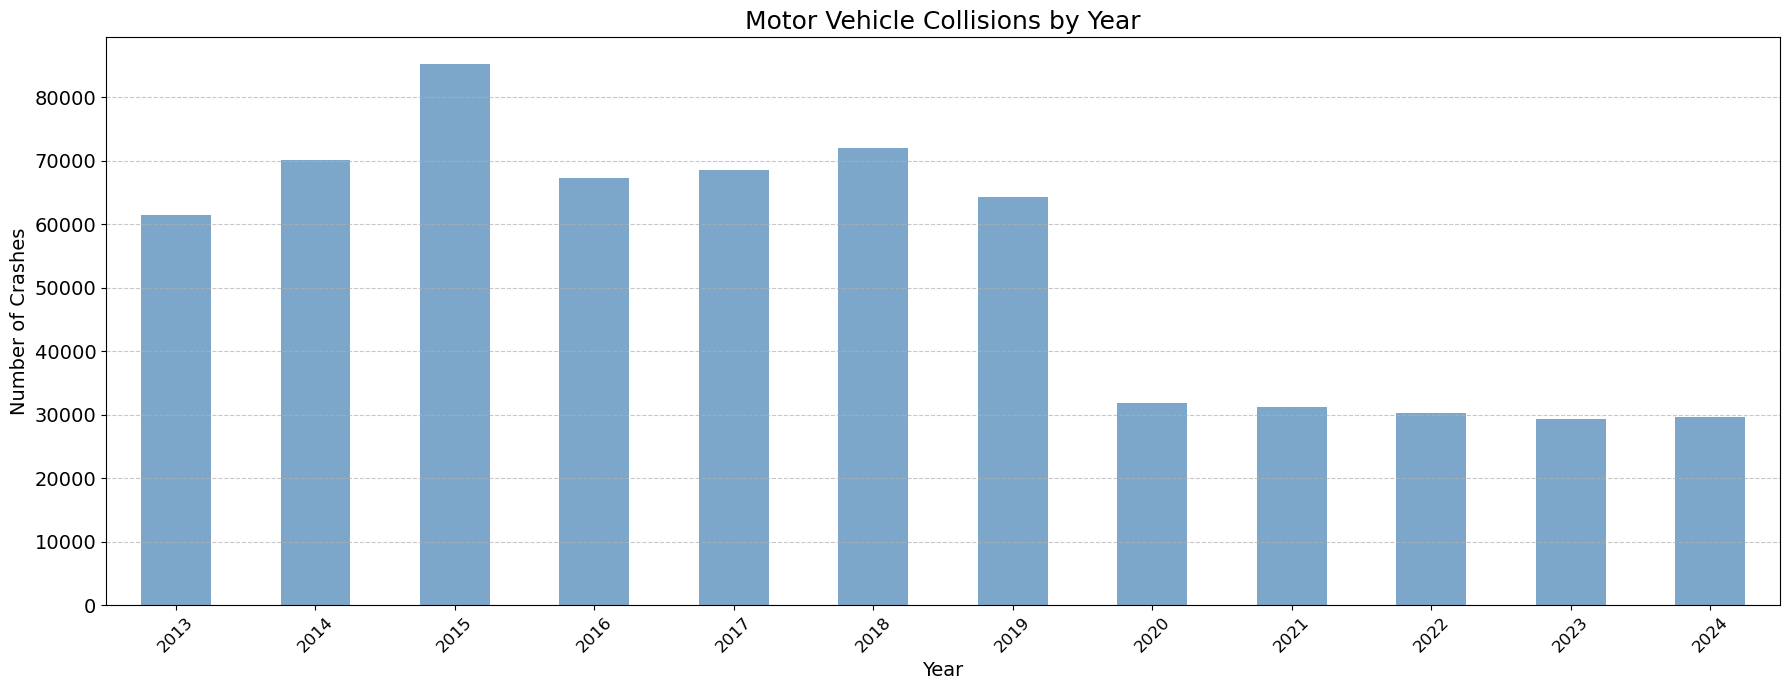

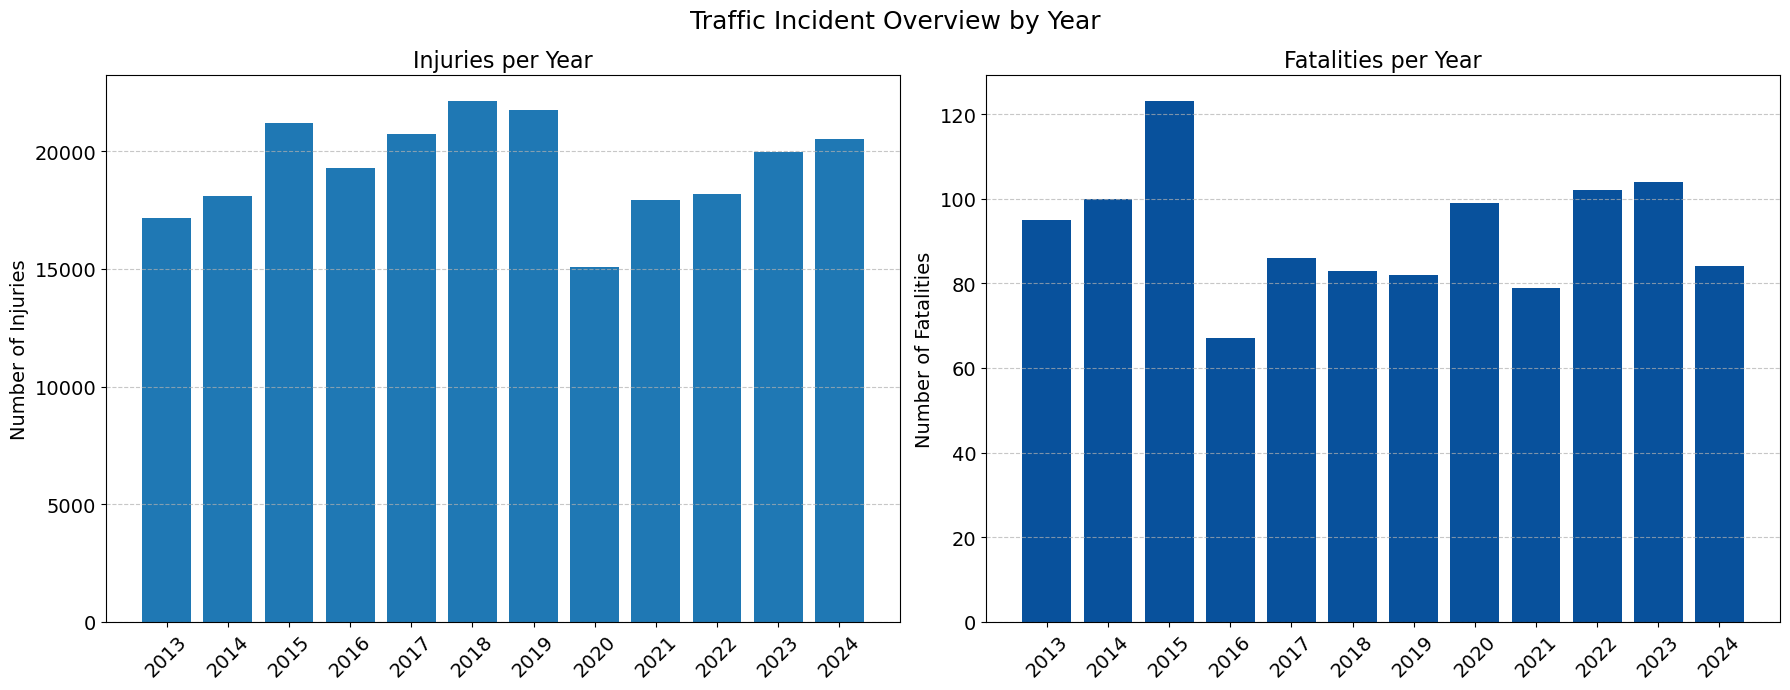

In [17]:
# Data processing
crashes = data['Year'].value_counts().sort_index()
injuries = data['NUMBER OF PERSONS INJURED'].groupby(data['Year']).sum()
fatalities = data['NUMBER OF PERSONS KILLED'].groupby(data['Year']).sum()

years = sorted(data['Year'].unique())  # sorted years
x = np.arange(len(years))  # x locations

plt.figure(figsize=(18, 7))
data['Year'].value_counts().sort_index().plot(kind='bar', color='#4682b4', alpha=0.7, fontsize=14)
plt.title('Motor Vehicle Collisions by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# Save the figure
plt.savefig('motor_vehicle_collisions_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Plot each category
axes[0].bar(x, injuries, color='#1f78b4')
axes[0].set_title('Injuries per Year', fontsize=16)
axes[0].set_ylabel('Number of Injuries', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(years, rotation=45, fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

axes[1].bar(x, fatalities, color='#08519c')
axes[1].set_title('Fatalities per Year', fontsize=16)
axes[1].set_ylabel('Number of Fatalities', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(years, rotation=45, fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

# Overall title and layout
fig.suptitle('Traffic Incident Overview by Year', fontsize=18)
plt.tight_layout()  # leave space for title
#Save the figure
plt.savefig('traffic_incidents_overview.png', dpi=300, bbox_inches='tight')
plt.show()

In our initial investigation of the collisons of NYC, we observe a significantly drop of collions and injuries in 2020, however the number of fatalities in 2020 is sustained. To understand this, we dive into the difference between 2019 and 2020.

In [18]:
# # Filter data for 2019 and 2020
# data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# # Create a new column for the month
# data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

# # Create bar plot with months on the x-axis
# fig, ax = plt.subplots(figsize=(18, 7))
# data_19_20.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
# plt.title('Monthly Traffic Incidents in 2019 and 2020', fontsize=18)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Number of Incidents', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.legend(title='Year', fontsize=12, title_fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# plt.show()

An investigation of each month in both 2019 and 2020, and we find that biggest difference in number of incidence starts in March and April, excatly when COVID took over the world and the first lock downs where happening. 

In [19]:
# # Filter data for 2019 and 2020
# data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# # Create a new column for the month
# data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

# data_19_20_in = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# # Create bar plot with months on the x-axis
# fig, ax = plt.subplots(figsize=(18, 7))
# data_19_20_in.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
# plt.title('Monthly Injuries in 2019 and 2020', fontsize=18)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Number of Injuries', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.legend(title='Year', fontsize=12, title_fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# plt.show()

Irrelevante plots?

In [20]:
# # Filter data for 2019 and 2020
# data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# # Create a new column for the month
# data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

# data_19_20_fa = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# # Create bar plot with months on the x-axis
# fig, ax = plt.subplots(figsize=(18, 7))
# data_19_20_fa.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
# plt.title('Monthly Fatalities in 2019 and 2020', fontsize=18)
# plt.xlabel('Month', fontsize=14)
# plt.ylabel('Number of Fatalities', fontsize=14)
# plt.xticks(rotation=0, fontsize=12)
# plt.legend(title='Year', fontsize=12, title_fontsize=14)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# plt.show()

## Genre

We primarily used the Partitioned Poster and Flow Chart genres.

Our plots shows multiple panels (maps, bar plots, time series) side-by-side, which fits the Partitioned Poster genre.
Each individual visualization is presented in a flow so that findings from one plot is then used to make the next one, and thereby support the flow in the analysis. This combination lets users explore different aspects of the crash data while maintaining a clear narrative structure.



Of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer), we mainly used Visual Structuring by having all charts use similar color schemes and layouts to maintain visual consistency. We used stablising shot by showing three simple histograms to introduce the reader to the topic, and there it is easy to see what we want to analyse. Moreover we have transition guidance that help users orient themselves and stay visually grounded as they explore the analysis and to follow our process and reasoning.


From each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer) we used all three, Ordering, Interactivity and Messaging. The order was to ease the reader into it by having a linear path, so the plot before was connected to the plot after. In the visualizations we used hovering as interactions and also the option to view the timeline and to start and pause. Lastly, we used messaging by having useful text connected to each visualization to make it very clear together with captions and headlines.

## Visualizations

We have chosen to make 5 different visualizations to support our analysis:
- Histograms
- Interactive Coropleth Map of Crashes by Borough
- Interactive Bokeh Contributing factor plot
- Collision Density plot
- Heatmap

From the histograms in the beginning we found an interesting difference between 2019 and 2020, that led to diving down into those two years. To understand the difference in these two years we wanted to investigate several things, including contributing factors, time of day and location. 

First we created a collision density plot across hours of day for every day of the week. This shows an increase in the crashes around rush hour. This led us to the creation of the Bokeh plot showing us the contributing factors, since we had an idea, that inattention could be a cause of many of these crashes since people are tired after a long day of work. 

One of the things we also saw from the initial plots, were that even though there are half as many crashes in 2020 compared to 2019, there were more fatalities in 2020 compared to 2019. This led us to wonder why this might be. We considered the possibility, that because of COVID-19 less people travelled the street, giving way for people to drive faster. 

Therefore we investigated the number of crashes that happened because of the contributing factor of "Unsafe Speed", resulting in two histograms. 

To understand the difference between the two years, we are interested in seeing where in NYC the difference is. This leads to a coropleth map, that shows the number of crashes in each borough for the two years. 

Lastly we made a heatmap showing the crashes with an injury or fatality during rushhour traffic for the month of september for both 2019 and 2020 tp see if there were any change in where the crashes were. 

### Collision Density plot

C:\Users\miran\AppData\Local\Temp\ipykernel_2612\3219399049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019.loc[:, 'DayOfWeek'] = data_2019['CRASH DATE'].dt.day_name()
C:\Users\miran\AppData\Local\Temp\ipykernel_2612\3219399049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2019.loc[:, 'Hour'] = pd.to_datetime(data_2019['CRASH TIME'], format='%H:%M').dt.hour
C:\Users\miran\AppData\Local\Temp\ipykernel_2612\3219399049.py:9: SettingWithCopyWarning: 
A value is trying to be set on a cop

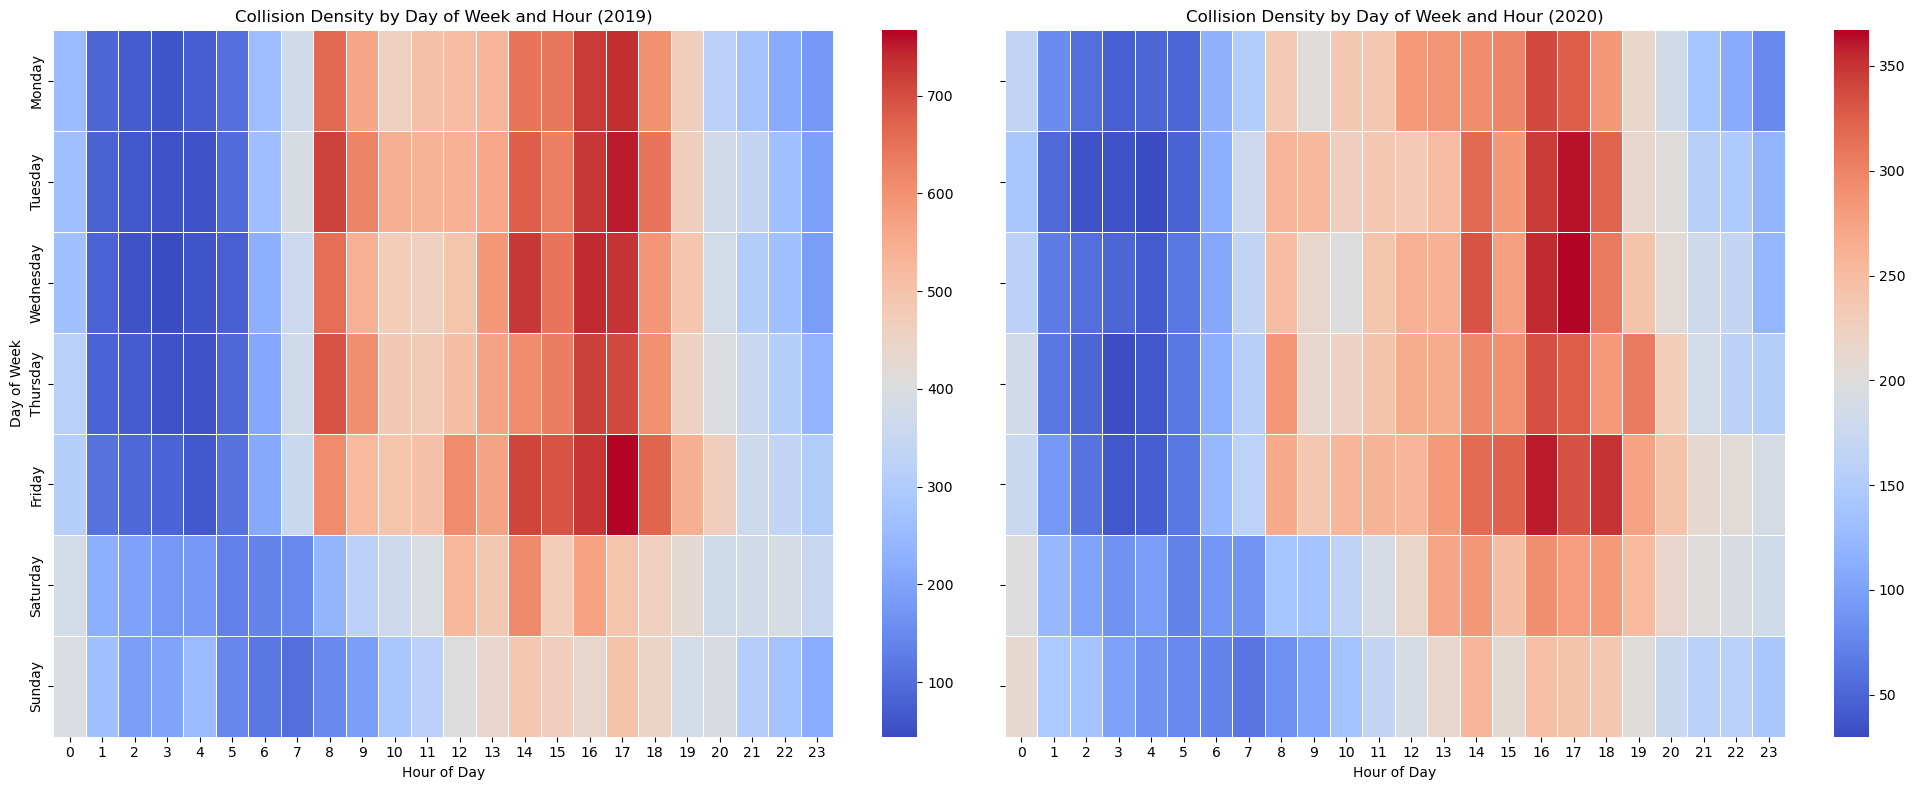

In [21]:
data_2019 = data[data['Year'] == 2019]
data_2020 = data[data['Year'] == 2020]

# Suppress SettingWithCopyWarning by using .loc
data_2019.loc[:, 'DayOfWeek'] = data_2019['CRASH DATE'].dt.day_name()
data_2019.loc[:, 'Hour'] = pd.to_datetime(data_2019['CRASH TIME'], format='%H:%M').dt.hour

# Extract day of week and hour
data_2019['DayOfWeek'] = data_2019['CRASH DATE'].dt.day_name()
data_2019['Hour'] = pd.to_datetime(data_2019['CRASH TIME'], format='%H:%M').dt.hour

# Pivot table for 2019
heatmap_data_2019 = data_2019.pivot_table(index='DayOfWeek', columns='Hour', values='COLLISION_ID', aggfunc='count').fillna(0)

# Sort days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data_2019 = heatmap_data_2019.reindex(days_order)

# Extract day of week and hour
data_2020['DayOfWeek'] = data_2020['CRASH DATE'].dt.day_name()
data_2020['Hour'] = pd.to_datetime(data_2020['CRASH TIME'], format='%H:%M').dt.hour

# Pivot table for 2020
heatmap_data_2020 = data_2020.pivot_table(index='DayOfWeek', columns='Hour', values='COLLISION_ID', aggfunc='count').fillna(0)

# Sort days properly
heatmap_data_2020 = heatmap_data_2020.reindex(days_order)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

sns.heatmap(heatmap_data_2019, cmap='coolwarm', linewidths=0.5, ax=axes[0])
axes[0].set_title('Collision Density by Day of Week and Hour (2019)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Day of Week')

sns.heatmap(heatmap_data_2020, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title('Collision Density by Day of Week and Hour (2020)')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('')

plt.tight_layout()
plt.savefig('collision_density_2019_2020.png', dpi=300)
plt.show()


## Summons in NYC

           year     2013     2014     2015     2016     2017     2018    2019  \
0  unsafe speed    83202   117767   134438   137260   149955   152368  148776   
1         total  1036942  1062504  1003043  1042703  1059256  1066376  985057   

     2020    2021    2022    2023    2024  
0  125011  108207  114848  108630   91226  
1  510342  508284  606623  689960  686725  


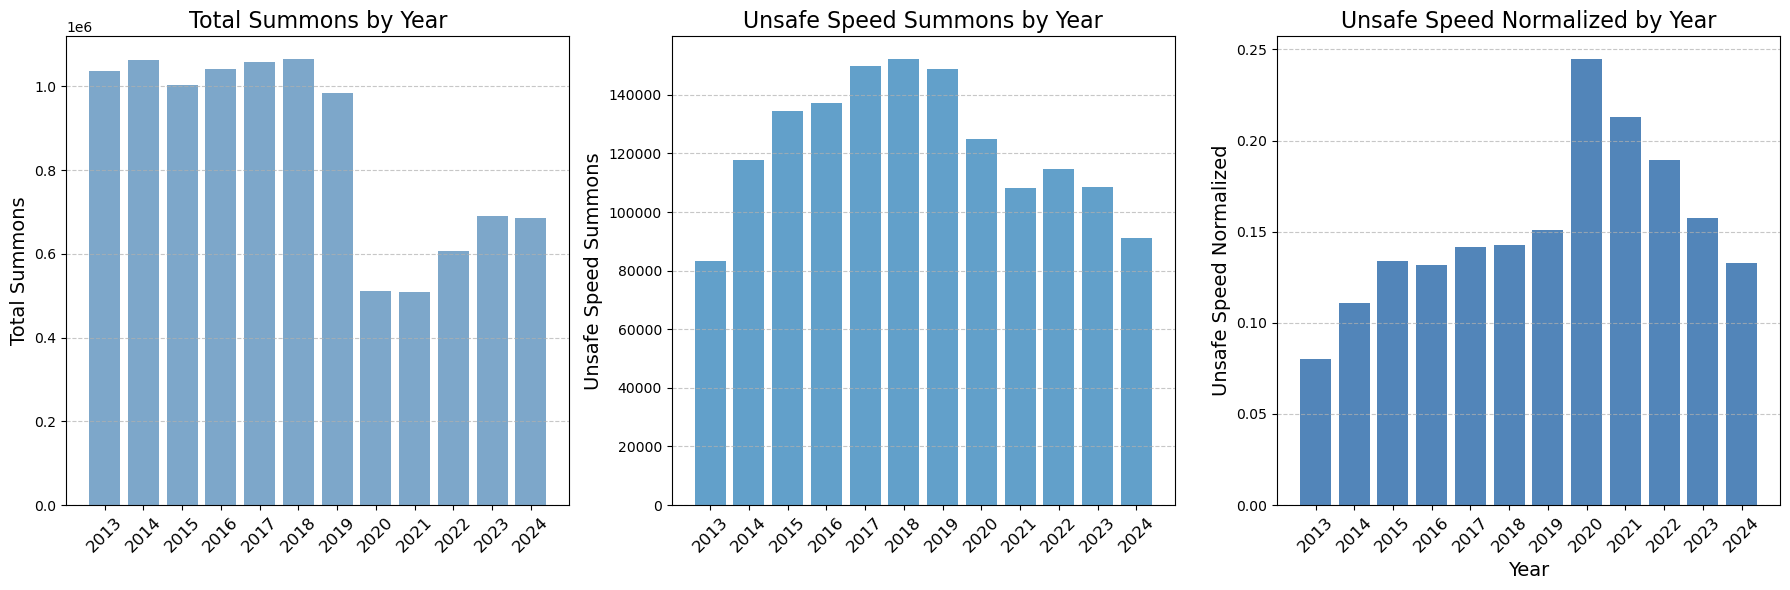

In [45]:
# Load the Excel file and select the "all" tab
file_path = "NYC_summons.xlsx"
df = pd.read_excel(file_path)
print(df.head())

total_summons = df.loc[df['year'] == 'total'].iloc[0, 1:].values
unsafe_speeding = df.loc[df['year'] == 'unsafe speed'].iloc[0, 1:].values
unsafe_speed_norm = df.loc[df['year'] == 'unsafe speed'].iloc[0, 1:].values / df.loc[df['year'] == 'total'].iloc[0, 1:].values

years = range(2013, 2025)

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plot total summons
axes[0].bar(years, total_summons, color='#4682b4', alpha=0.7)
axes[0].set_ylabel('Total Summons', fontsize=14)
axes[0].set_title('Total Summons by Year', fontsize=16)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks(years)
axes[0].set_xticklabels(years, rotation=45, fontsize=12)

# Plot unsafe speed summons
axes[1].bar(years, unsafe_speeding, color='#1f78b4', alpha=0.7)
axes[1].set_ylabel('Unsafe Speed Summons', fontsize=14)
axes[1].set_title('Unsafe Speed Summons by Year', fontsize=16)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticks(years)
axes[1].set_xticklabels(years, rotation=45, fontsize=12)

# Plot unsafe speed normalized
axes[2].bar(years, unsafe_speed_norm, color='#08519c', alpha=0.7)
axes[2].set_xlabel('Year', fontsize=14)
axes[2].set_ylabel('Unsafe Speed Normalized', fontsize=14)
axes[2].set_title('Unsafe Speed Normalized by Year', fontsize=16)
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].set_xticks(years)
axes[2].set_xticklabels(years, rotation=45, fontsize=12)

# Adjust layout and save the figure
#plt.xticks(years, rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig('summons_analysis_subplots.png', dpi=300, bbox_inches='tight')
plt.show()


### Contributing factor

In [31]:
curdoc().theme = "caliber"

output_file(filename="Interactive_Crashes_by_Contributing_Factor.html", title="Crashes by Year and Factor")

# Find the 10 most common contributing factors
top_factors = (data['CONTRIBUTING FACTOR VEHICLE 1']
               .value_counts()
               .head(10)
               .index
               .tolist())

top_factors = top_factors +  ["Unsafe Speed"]
# Filter the dataset to only include the top 10 factors
data_bokeh = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors)]

# Group by Year and Contributing Factor, and count
data_bokeh = data_bokeh.groupby(['Year', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Pivot the data so each contributing factor becomes a column
data_pivot = data_bokeh.pivot(index='Year', columns='CONTRIBUTING FACTOR VEHICLE 1', values='Count').fillna(0).reset_index()

# Sort by Year
data_pivot = data_pivot.sort_values('Year')

# Convert Year to string for categorical x-axis
data_pivot['Year'] = data_pivot['Year'].astype(str)

# Create the ColumnDataSource
data_source = ColumnDataSource(data_pivot)

# Create the figure with categorical x-axis
years = data_pivot['Year'].tolist()
p = figure(x_range=years, title='Crashes by Year and Contributing Factor', height=600, width=900)

# Choose palette - extend if needed
palette = Category10[10]

# Add bars for each contributing factor
bars = []
for index, factor in enumerate(top_factors):
    bar = p.vbar(
        x='Year',
        top=factor,
        source=data_source,
        legend_label=factor,
        color=palette[index % len(palette)],
        width=0.9,
        name=factor,
        alpha=0.7
    )
    bars.append(bar)

# Hover tool
hover = HoverTool(tooltips=[
    ("Contributing Factor", "$name"),
    ("Year", "@Year"),
    ("Number of Crashes", "@$name"),
])
p.add_tools(hover)

# Axis labels
p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Number of Crashes'
p.xaxis.formatter = NumeralTickFormatter(format="0")

# Move legend
# Remove old legend
p.legend.visible = False

# Create a new Legend object
legend = Legend(items=[
    (name, [renderer]) for name, renderer in zip(top_factors, bars)
], location="center")

legend.title = "Contributing Factor"
legend.click_policy = "hide"

# Add the legend manually
p.add_layout(legend, 'right')

# Show plot
output_notebook()
show(p)

# Optional: print top factors
print(f"Top 10 Contributing Factors: {top_factors}")


Loading BokehJS ...

Top 10 Contributing Factors: ['Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Other Vehicular', 'Backing Unsafely', 'Turning Improperly', 'Traffic Control Disregarded', 'Passing or Lane Usage Improper', 'Fatigued/Drowsy', 'Passing Too Closely', 'Unsafe Speed']


### Contributing factor normalized

In [32]:
# Create the figure with normalized y-axis and updated y-limit
p_normalized = figure(x_range=years, title='Normalized Crashes by Year and Contributing Factor', height=600, width=900, y_range=(0, 0.4))

output_file(filename="Interactive_Crashes_by_Contributing_Factor_Normalized.html", title="Crashes by Year and Factor, normalized")

top_factors = (data['CONTRIBUTING FACTOR VEHICLE 1']
               .value_counts()
               .head(10)
               .index
               .tolist())

top_factors = top_factors +  ["Unsafe Speed"]
# Normalize the data for top factors
data_bokeh_normalized = data[data['CONTRIBUTING FACTOR VEHICLE 1'].isin(top_factors)]
data_bokeh_normalized = data_bokeh_normalized.groupby(['Year', 'CONTRIBUTING FACTOR VEHICLE 1']).size().reset_index(name='Count')

# Calculate total crashes per year
total_crashes_per_year = data.groupby('Year').size()

# Normalize the counts
data_bokeh_normalized['Proportion'] = data_bokeh_normalized.apply(
    lambda row: row['Count'] / total_crashes_per_year[row['Year']], axis=1
)

# Pivot the data so each contributing factor becomes a column
data_pivot_normalized = data_bokeh_normalized.pivot(index='Year', columns='CONTRIBUTING FACTOR VEHICLE 1', values='Proportion').fillna(0).reset_index()

# Convert Year to string for categorical x-axis
data_pivot_normalized['Year'] = data_pivot_normalized['Year'].astype(str)

# Create the ColumnDataSource
data_source_normalized = ColumnDataSource(data_pivot_normalized)

# Add bars for each contributing factor with normalized data
bars_normalized = []
for index, factor in enumerate(top_factors):
    bar = p_normalized.vbar(
        x='Year',
        top=factor,
        source=data_source_normalized,
        legend_label=factor,
        color=palette[index % len(palette)],
        width=0.9,
        name=factor,
        alpha=0.7
    )
    bars_normalized.append(bar)

# Hover tool for normalized plot
hover_normalized = HoverTool(tooltips=[
    ("Contributing Factor", "$name"),
    ("Year", "@Year"),
    ("Proportion of Crashes", "@$name{0.00%}"),
])
p_normalized.add_tools(hover_normalized)

# Axis labels
p_normalized.xaxis.axis_label = 'Year'
p_normalized.yaxis.axis_label = 'Proportion of Crashes'
p_normalized.xaxis.formatter = NumeralTickFormatter(format="0")

# Move legend
p_normalized.legend.visible = False
legend_normalized = Legend(items=[
    (name, [renderer]) for name, renderer in zip(top_factors, bars_normalized)
], location="center")
legend_normalized.title = "Contributing Factor"
legend_normalized.click_policy = "hide"
p_normalized.add_layout(legend_normalized, 'right')

# Show normalized plot
output_notebook()
show(p_normalized)

Loading BokehJS ...

2020 saw only a small dip in unsafe speed crashes, especially compared to the substantial drop in overall collisions due to the COVID-19 pandemic. This suggests that while fewer people were driving, those who were on the roads may have been driving faster due to reduced traffic congestion.  

### Crashes by Borough

In [26]:
# Filter data for 2019 and 2020
df = data[data['Year'].isin([2019, 2020])]

# Count crashes by borough and year
crashes_by_borough_year = df.groupby(['Year', 'BOROUGH']).size().reset_index(name='value')
crashes_by_borough_year['BOROUGH'] = crashes_by_borough_year['BOROUGH'].str.title()  # Standardize borough names
crashes_by_borough_year.rename(columns={'BOROUGH': 'borough'}, inplace=True)

geojson_url = "https://raw.githubusercontent.com/codeforgermany/click_that_hood/main/public/data/new-york-city-boroughs.geojson"
geojson_data = requests.get(geojson_url).json()

# Plotting with animation
fig = px.choropleth(
    crashes_by_borough_year,
    geojson=geojson_data,
    locations='borough',
    featureidkey='properties.name',  # This is the GeoJSON field that matches the borough name
    color='value',
    color_continuous_scale="Viridis",
    range_color=(0, crashes_by_borough_year['value'].max()),
    scope="usa",
    hover_name='borough',
    hover_data=['Year'],
    # Add animation frame
    animation_frame='Year',  # Add animation by year
    labels={'value': 'Crashes'},
    title='Crashes by Borough (2019 and 2020)',
)

fig.update_geos(fitbounds="locations", visible=False)  

# Save the figure as an HTML file
pio.write_html(fig, file="crashes_by_borough.html", auto_open=True)

### Heatmap

In [27]:
map_data = data.copy()

map_data['Month'] = pd.to_datetime(map_data['CRASH DATE']).dt.month
map_data = map_data[(map_data['Month'] == 9)]
map_data['Hour'] = pd.to_datetime(map_data['CRASH TIME'], format='%H:%M').dt.hour
map_data = map_data[(map_data['Hour'] < 19) & (map_data['Hour'] > 14)]
hours = sorted(map_data['Hour'].unique())  # sorted hours
map_data = map_data[(map_data['NUMBER OF PERSONS INJURED'] > 0) | (map_data['NUMBER OF PERSONS KILLED'] > 0)]

map_data_2019 = map_data[map_data['Year'] == 2019]
map_data_2020 = map_data[map_data['Year'] == 2020]

# Ensure latitude and longitude are floats
map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)

map_data_2020['LATITUDE'] = map_data_2020['LATITUDE'].astype(float)
map_data_2020['LONGITUDE'] = map_data_2020['LONGITUDE'].astype(float)

map19 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map20 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

heat_data_19 = [
    map_data_2019[map_data_2019['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

heat_data_20 = [
    map_data_2020[map_data_2020['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_19,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map19)

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_20,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map20)

#Display the maps
display(map19)
display(map20)

#Save the map to an HTML file
map19.save('heatmap_2019.html')
map20.save('heatmap_2020.html')

C:\Users\miran\AppData\Local\Temp\ipykernel_2612\1630899691.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\miran\AppData\Local\Temp\ipykernel_2612\1630899691.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\miran\AppData\Local\Temp\ipykernel_2612\1630899691.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

## Data analysis

To understand the dataset, we made intitial plots to determine which direction to take the analysis. 

Our data analysis started by examining overall collision trends from 2013 to 2024. From these initial histograms, We noticed a significant drop in collisions in 2020, likely linked to the COVID-19 pandemic and reduced traffic. This anomaly led us to focus more closely on the differences between these two years to understand what changed and why.

To begin unpacking this, we looked into several aspects:

Starting by investigating crashes by hour of the day and day of the week. This clearly showed spikes during morning and evening rush hours, suggesting that these are high-risk times for collisions. Given this pattern, we will suggest that driver fatigue and distraction might be major contributing factors during these times. We continued to explore contributing factors to collisions, which confirmed that Driver Inattention/Distraction was consistently one of the leading causes of accidents across all boroughs and especially pronounced during rush hours. This insight reinforces the link between peak traffic times and inattentive driving behavior.

Another surprising finding from the initial histograms was that despite having roughly half the number of crashes in 2020 compared to 2019, the number of fatalities actually increased.  We considered that lower traffic volumes due to COVID-19 may have led to more open roads — creating conditions where people could drive at higher speeds, increasing the severity of collisions. To explore this further, we analyzed crashes caused by Unsafe Speed. We generated yearly histograms showing that while the overall number of crashes dropped in 2020, the number of speed-related crashes did not fall significantly. In fact, unsafe speed remained a substantial contributing factor, which supports the idea that fewer cars on the road may have led to riskier driving behavior.

To understand where these differences were happening, we created a choropleth map showing the number of crashes in each NYC borough for 2019 and 2020. This visualization revealed that while all boroughs experienced a decrease in crashes in 2020, the drop was more significant in areas like Manhattan and Brooklyn. This could be due the fact, that these areas have more people and therefore where more affected by COVID.

Finally, to detect any changes in collision severity and location during high-risk periods, we created a heatmap of crashes resulting in injury or fatality during rush hour in September, comparing 2019 and 2020. This allowed us to analyze where the most dangerous incidents were occurring, and whether those patterns shifted during the pandemic, which we saw a very clear drop from 2019 to 2020.

## Discussion

Our exploration of NYC collision data revealed how drastically traffic dynamics can shift in response to external events, because of for example the COVID-19 pandemic. The reduction in total collisions from 2019 to 2020 initially suggested a safer traffic environment, but the increase in fatalities challenged that assumption and forced a deeper consideration of collision severity, not just frequency.

One of the most interesting insights was that risk factors like driver inattention and unsafe speed remained prominent even as total traffic volume dropped. This implies that fewer cars on the road doesn’t nessesary mean safer roads. Actually, open roads may have created opportunities for more dangerous behavior, such as speeding. The consistency of driver inattention as a leading cause, especially during rush hours, reflects a deeper behavioral pattern that doesn't disappear even with changing traffic conditions.

While the analysis showed that all boroughs had fewer collisons in 2020, it also revealed uneven impacts, with areas like Manhattan and Brooklyn experiencing a bigger descrease. This is an example of the importance of local context when doing the analysis. 

While the visual tools we used were effective for the questions we were analysing, other visualization methods could have added additional layers of insight. Box plots might have been used to compare the distribution of crashes across different boroughs or time periods. Or a time-series line chart showing crashes, injuries, and fatalities over time could better highlight fluctuations and seasonal trends. 

However, we tried incorporating weather data, assuming that conditions like rain or snow might correlate with more collisons. Surprisingly, this did not provide any meaningful insight, either because the effect was minimal, or because it was overshadowed by stronger variables like behavior and time of day. This was a key challenge in the data analysis, not all relevant data would yield useful patterns.

Another limitation we faced was the presence of missing or unspecified contributing factors, which restricted the accuracy of contribution conclusions. A more complete dataset could enable more robust statistical models or even predictive analytics, estimating crash risk based on time, location, weather, or known traffic conditions.

Still, our analysis demonstrates the power of data-driven exploration to reveal hidden patterns and challenge surface-level assumptions. With better data and additional perspectives. this type of analysis can meaningfully inform efforts to understand traffic patterns better.


## Contributions

Karen Witness s196140: Mainly responsible for creating website, making coropleth map and writing text for explainer notebook.

Ida Sandelius s204649: Mainly responsible for finding direction of analysis, making the density plot and bokeh plot and writing text for website.

Miranda Niemann Kristensen s204257: Mainly resposible for updating website with plots, making histograms and heatmap and setting up all plots for notebook. 